# Primitive data structures

It is important to understand the difference between sets and lists.

## Sets
A set is an *unordered* collection of *distinct* elements.

In [1]:
my_set = {1,2,3,2,3}
my_other_set = {1,2,3}
print('my_set is a {0}, and its contents are {1}.'.format(type(my_set), my_set))
print('my_other_set is a {0}, and its contents are {1}.'.format(type(my_other_set), my_other_set))

my_set is a <class 'set'>, and its contents are {1, 2, 3}.
my_other_set is a <class 'set'>, and its contents are {1, 2, 3}.


Notice that even though we constructed `my_set` with repeats of some elements, the set itself is composed only of the distinct elements.

In [2]:
print('True or false: my_set is equal to my_other_set. {0}.'.format(my_set == my_other_set))

True or false: my_set is equal to my_other_set. True.


## Lists
A list or tuple maps the natural numbers to elements. Python distinguishes lists and tuples, but we won't worry about the difference. An element can appear more than once in the list, since different natural numbers can map to the same element.

Note that Python uses '0-indexing', whereas math people (and everyone else) uses '1-indexing'.

In [3]:
my_list = [1,2,3,2,3]
my_tuple = (1,2,3,2,3)
print('my_list is a {0}, and its contents are {1}. Its fourth element is {2}.'.format(type(my_list), my_list, my_list[3]))
print('my_tuple is a {0}, and its contents are {1}. Its fourth element is {2}.'.format(type(my_tuple), my_tuple, my_tuple[3]))

my_list is a <class 'list'>, and its contents are [1, 2, 3, 2, 3]. Its fourth element is 2.
my_tuple is a <class 'tuple'>, and its contents are (1, 2, 3, 2, 3). Its fourth element is 2.


# Vectors

We will use 1D arrays from NumPy to implement $n$-vectors.

In [4]:
# standard import statement for the numpy library
# you should run this line every time you open a Colab notebook
import numpy as np

# call the array() function to define and return a numpy array
v = np.array([1,2,3])   # argument may be a Python list
w = np.array((3,2,1))   # argument may also be a tuple

print("v is a {0}; it represents a {1}-vector, and its contents are {2}.".format(type(v), v.size, v))
print("w is a {0}; it represents a {1}-vector, and its contents are {2}.".format(type(w), w.size, w))

v is a <class 'numpy.ndarray'>; it represents a 3-vector, and its contents are [1 2 3].
w is a <class 'numpy.ndarray'>; it represents a 3-vector, and its contents are [3 2 1].


Sadly, NumPy prints $n$-vectors in a somewhat weird way -- this is truly a real shame. Remember, we really prefer to write $n$-vectors in column format,
$$ \mathbf v = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}, \quad 
\mathbf w = \begin{bmatrix} 3 \\ 2 \\ 1 \end{bmatrix} , $$
or in list format,
$$ \mathbf v = (1,2,3) , \quad \mathbf w = (3,2,1) . $$

## Indexing

We *index* vectors to access individual components, e.g.,  $\mathbf v = (v_1,v_2,v_3)$. But remember, Python uses '0-indexing'.

In [5]:
print("v_1 = {0}, v_2 = {1}, v_3 = {2}.".format(v[0], v[1], v[2]))
print("w_1 = {0}, w_2 = {1}, w_3 = {2}.".format(w[0], w[1], w[2]))
print("last element of v is {0}.".format(v[-1]))  # negative indices are used to start indexing from the end; we won't use this outside of Python!
print("second-to-last element of w is {0}.".format(w[-2]))

v_1 = 1, v_2 = 2, v_3 = 3.
w_1 = 3, w_2 = 2, w_3 = 1.
last element of v is 3.
second-to-last element of w is 2.


More than just individual components, NumPy is able to extract multiple components of a vector at once using creative indexing. For example, we can input a list of indices instead of a single index inside the brackets.

In [6]:
w = np.array([1,4,-5,2,-7,8])
print("w = {0}.".format(w))
print("[w_1, w_3, w_6] = {0}.".format(w[[0,2,5]]))

w = [ 1  4 -5  2 -7  8].
[w_1, w_3, w_6] = [ 1 -5  8].


## Slicing and striding (NumPy only)
NumPy allows one to select multiple components of an `ndarray` using the `:` (colon) operator. This is called [slicing and striding](https://numpy.org/doc/stable/user/basics.indexing.html#slicing-and-striding) in NumPy.

In [7]:
print("components of w between the 2nd element and (but not including) the 5th element: {0}".format(w[1:4]))
print("components of w up to (but not including) the 5th element: {0}".format(w[:4])) # starting index defaults to 0 if not given
print("components of w starting with the 4th element: {0}".format(w[3:])) # ending index defaults to *one after the last* if not given

print("every 2 components of w between the 2nd element and (but not including) the 5th element: {0}".format(w[1:4:2]))
print("every 2 components of w up to (but not including) the 5th element: {0}".format(w[:4:2]))
print("every 3 components of w starting with the 4th element:", w[3::3])

components of w between the 2nd element and (but not including) the 5th element: [ 4 -5  2]
components of w up to (but not including) the 5th element: [ 1  4 -5  2]
components of w starting with the 4th element: [ 2 -7  8]
every 2 components of w between the 2nd element and (but not including) the 5th element: [4 2]
every 2 components of w up to (but not including) the 5th element: [ 1 -5]
every 3 components of w starting with the 4th element: [2]


## Manipulation (NumPy only)

NumPy arrays are *mutable*, which means they can be modified after they are defined. For example, we can change array entries using indexing. Simply place the part of the array you want to change on the LHS of an equals sign, and place the new values on the RHS. The sizes on either side must be the same, with the exception that if the RHS is a scalar, the same value is applied to all entries on the LHS.

In [8]:
w[0] = 0            # set 1st element to 0
w[[2,4]] = [-2,-4]  # set 3rd and 5th elements to -2 and -4
w[1::2] = -1        # set every 2 elements starting from the 2nd element to -1
print(w)

[ 0 -1 -2 -1 -4 -1]


NumPy also allows you to add or delete entries from an array, or concatenate two arrays together. There are a number of different [functions](https://numpy.org/doc/stable/reference/routines.array-manipulation.html) that allow you to do this. We'll show the most commonly used ones for 1D arrays (vectors) and revisit some of these when discuss 2D arrays (matrices).

**These functions do not change the original np array but rather return a new array.**

In [9]:
print(np.append(v, 10))       # append 10 to the end of v
print(np.append(v, [10,11]))  # append the array [10,11] to v (still returns one array)
print(np.insert(v, 1, -1))    # insert -1 into the 1 component of v
print(np.delete(v, 1))        # delete entry in the 1 component of v

[ 1  2  3 10]
[ 1  2  3 10 11]
[ 1 -1  2  3]
[1 3]


## Special Vectors

Certain vectors appear often in different contexts that it is useful to give them a name and a special way to define them in NumPy. For example, the **zero vector** is a $n$-vector of all 0s, denoted $\mathbf 0_n$ or just $\mathbf 0$. The **ones vector** is a $n$-vector of all 1s, denoted $\mathbf 1_n$ or just $\mathbf 1$. (Apologies are in order: subscripts are being used here in yet another way.)

For many programming tasks, we may have to generate a vector of evenly spaced  values within a certain interval. This may be accomplished using `numpy.arange` or `numpy.linspace`.

*`arange` means evenly spaced values within a given interval. When using a non-integer interval, the results will often not be consistent. Better to use `linspace` for these cases.*

In [10]:
print("A 3-vector of all zeros:", np.zeros(3))
print("A 5-vector of all ones:", np.ones(5))

print(np.arange(8))         # arange with 1 argument: values 0 to 8 with interval 1
print(np.arange(3,8))       # arange with 2 arguments: values 3 to 8 with interval 1
print(np.arange(3,8,2))     # arange with 3 arguments: values 3 to 8 with interval 2
print(np.linspace(3,8))     # linspace with 2 arguments: 50 (default) values from 3 to 8
print(np.linspace(3,8,10))  # linspace with 3 arguments: 10 values from 3 to 8

A 3-vector of all zeros: [0. 0. 0.]
A 5-vector of all ones: [1. 1. 1. 1. 1.]
[0 1 2 3 4 5 6 7]
[3 4 5 6 7]
[3 5 7]
[3.         3.10204082 3.20408163 3.30612245 3.40816327 3.51020408
 3.6122449  3.71428571 3.81632653 3.91836735 4.02040816 4.12244898
 4.2244898  4.32653061 4.42857143 4.53061224 4.63265306 4.73469388
 4.83673469 4.93877551 5.04081633 5.14285714 5.24489796 5.34693878
 5.44897959 5.55102041 5.65306122 5.75510204 5.85714286 5.95918367
 6.06122449 6.16326531 6.26530612 6.36734694 6.46938776 6.57142857
 6.67346939 6.7755102  6.87755102 6.97959184 7.08163265 7.18367347
 7.28571429 7.3877551  7.48979592 7.59183673 7.69387755 7.79591837
 7.89795918 8.        ]
[3.         3.55555556 4.11111111 4.66666667 5.22222222 5.77777778
 6.33333333 6.88888889 7.44444444 8.        ]


## Visualizing Vectors

Vectors of arbitrary dimension can be defined easily by just writing down a list with many elements. We can also visualize 2-vectors and 3-vectors as points or arrows in 2D and 3D space (but no higher). A vector's elements define the coordinates of a point in the standard coordinate system, so we can equate that point with the vector itself.

Thinking of a vector as an arrow, we can place the *tail* of the arrow at the origin and the *head* of the arrow at the coordinates specified by the vector elements.

Note that we can also move a vector so that its tail shifted away from the origin.

*`plt.arrow(x,y,dx,dy)` x and y are the arrow base, dx and dy are the displacements. other arguments are optional for styling purposes.*

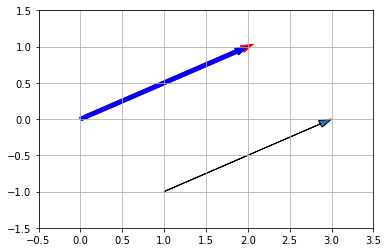

In [11]:
# library that you will often use for plotting objects
import matplotlib.pyplot as plt

a = np.array([2,1])
plt.arrow(0, 0, a[0], a[1], head_width=.1, length_includes_head=True)  # plotting a as an arrow from the origin
plt.arrow(1, -1, a[0], a[1], head_width=.1, length_includes_head=True) # same vector, but from (1,-1)
plt.arrow(0,0,a[0], a[1], head_width=.1, width=0.05, color="r", length_includes_head=True, head_starts_at_zero=True)
plt.arrow(0,0,a[0], a[1], head_width=.1, width=0.05, color="b", length_includes_head=True)
plt.axis([-0.5,3.5,-1.5,1.5])
plt.grid()

## Vector Operations

Just as we can perform operations on scalars, we can also perform certain operations on vectors.

### Vector scaling

Scaling a vector by a scalar $\alpha$ means multiplying each element of the vector by $\alpha$. This results in a new vector:

$$ \alpha \mathbf v = (\alpha v_1, \ldots, \alpha v_n) $$

Another way to think about this operation is that we are simply changing the magnitude of $\mathbf v$ by stretching or compressing it. If $|\alpha| > 1$, $\mathbf v$ is stretched; if $|\alpha| < 1$, $\mathbf v$ is compressed. If $\alpha < 0$, the direction of $\mathbf v$ is flipped. Any of these cases can be visualized in 2-vectors and 3-vectors.

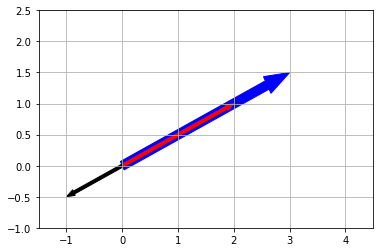

In [12]:
a = np.array([2,1])
b = 1.5*a
c = -0.5*a

plt.arrow(0, 0, b[0], b[1], head_width=.3, width=0.15, color="b", length_includes_head=True) 
plt.arrow(0, 0, a[0], a[1], head_width=.1, width=0.05, color="r", length_includes_head=True)  
plt.arrow(0, 0, c[0], c[1], head_width=.1, width=0.05, color="k", length_includes_head=True) 
plt.axis([-1.5,4.5,-1,2.5])
plt.grid()

### Vector addition

*Vector addition* can be applied to two or more given vectors of the same dimension. The sum of two vectors is the sum of each of the vectors' corresponding elements, which is a new vector of the same size:

$$\mathbf v + \mathbf w = (v_1+w_1, \ldots, v_n+w_n)$$

To visualize this in 2 and 3 dimensions, you can imagine taking the tail of the vector $\mathbf w$ and moving it so that it is coincident with the head of $\mathbf v$. The sum is the new vector whose tail is coincident with the tail of $\mathbf v$ and whose head is coincident with the head of $\mathbf w$.

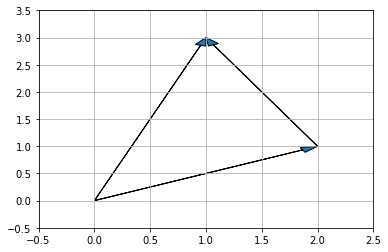

In [13]:
a = np.array([2,1])
b = np.array([-1,2])
c = a + b

plt.arrow(0, 0, a[0], a[1], head_width=.1, length_includes_head=True)
plt.arrow(a[0], a[1], b[0], b[1], head_width=.1, length_includes_head=True)
plt.arrow(0, 0, c[0], c[1], head_width=.1, length_includes_head=True)  
plt.axis([-0.5,2.5,-0.5,3.5])
plt.grid()

# Linear combinations and spans

The function `in_span` can be used to check whether a given vector is in the span of other given vectors. This function is implemented using another library (SymPy), but it can be used with NumPy vectors. Don't worry about understanding the implementation until we cover the Gauss-Jordan method.

In [14]:
import numpy as np
import sympy

def in_span(b, *vectors):
  '''
  Checks for membership in a span.

  Parameters:
  b : 1D array
    vector b
  *vectors : 1D arrays
    vectors v1, v2, ...

  Returns:
  t : bool
    membership status of b in span of {v1, v2, ...}
  x : ndarray or NoneType
    if t is True, then x is 1D array of coefficients that witnesses the membership
    if t is False, then x is None
  '''
  try:
    sol, params = sympy.Matrix(vectors).T.gauss_jordan_solve(sympy.Matrix(b))
  except ValueError:
    return (False, None)
  return (True, np.array(sol.xreplace({ f:0 for f in params })).astype(np.float64))

In [15]:
(t, x) = in_span([4,4,4], [1,2,3], [3,4,5])     # is (4,4,4) in the span of { (1,2,3), (3,4,5) }?
if t:
  print(x)
else:
  print("Not in span")

[[-2.]
 [ 2.]]


In [16]:
(t, x) = in_span([2,2,1], [1,2,3], [3,4,5])     # is (2,2,1) in the span of { (1,2,3), (3,4,5) }?
if t:
  print(x)
else:
  print("Not in span")

Not in span


In [17]:
(t, x) = in_span([3,5,-2], [1,0,-1], [0,1,1])
if t:
  print(x)
else:
  print("Not in span")

Not in span


In [18]:
(t, x) = in_span([3,3,1,4],[0,1,0,1], [0,1,2,2], [1,1,0,0], [1,1,0,0],[0,0,3,1])
if t:
  print(x)
else:
  print("Not in span")

[[-11.]
 [ 11.]
 [  3.]
 [  0.]
 [ -7.]]


In [20]:
(t, x) = in_span([2,4,6], [1,2,3], [3,4,5])
if t:
  print(x)
else:
  print("Not in span")

[[2.]
 [0.]]


In [24]:
(t, x) = in_span([0,0,1], [1,2,3], [3,4,5])
if t:
  print(x)
else:
  print("Not in span")

Not in span


In [27]:
(t, x) = in_span([0,1], [1,2,3], [3,4,5])
if t:
  print(x)
else:
  print("Not in span")

Not in span


In [25]:
(t, x) = in_span([1,2,3], [3,4,5])
if t:
  print(x)
else:
  print("Not in span")

Not in span


In [26]:
(t, x) = in_span([0,0,0], [1,2,3])
if t:
  print(x)
else:
  print("Not in span")

[[0.]]


In [19]:
# sol, param = sympy.Matrix([7,13,6,6,7]).T.gauss_jordan_solve(sympy.Matrix([0,1,0,1], [0,1,2,2], [1,1,0,0], [1,1,0,0],[0,0,3,1]))
# sol, param = sympy.Matrix([0,1,0,1], [0,1,2,2], [1,1,0,0], [1,1,0,0],[0,0,3,1]).gauss_jordan_solve(sympy.Matrix([7,13,6,6,7]))
# sol

from sympy import Matrix
A = Matrix([[0,1,0,1], [0,1,2,2], [1,1,0,0], [1,1,0,0],[0,0,3,1]])
B = Matrix([7,13,6,6,7])
sol, params = A.gauss_jordan_solve(B)
sol

Matrix([
[3],
[3],
[1],
[4]])